In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import faker as fk
df =pd.read_csv('Bestfrauddata.csv')
pd.set_option('display.max_columns', None)
original_df = df.copy()
og_df=original_df.copy()
print(df.columns)

df


Index(['acc_days', 'failed_logins', 'is_vpn_or_proxy', 'transaction_amount',
       'is_card_blacklisted', 'is_multiple_cards_used', 'items_quantity',
       'pages_viewed', 'device_change_during_session', 'category',
       'purchase_frequency_user', 'is_fraud', 'email'],
      dtype='object')


,acc_days,failed_logins,is_vpn_or_proxy,transaction_amount,is_card_blacklisted,is_multiple_cards_used,items_quantity,pages_viewed,device_change_during_session,category,purchase_frequency_user,is_fraud,email
0,503,5,False,1113.62,False,False,2,17,False,Electronics,26,0,zf6iovpb@outlook.com
1,1538,2,False,237.44,False,False,4,18,False,Home Appliances,8,0,xc6f68k1@gmail.com
2,607,5,False,420.57,False,False,4,9,False,Electronics,26,0,b1v619a1@gmail.com
3,1399,2,False,322.88,False,True,3,5,False,Groceries,14,0,avmp55jz@gmail.com
4,1201,4,False,380.86,False,True,2,1,False,Beauty,17,0,baoqjqza@gmail.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1174,3,False,1131.93,False,True,5,19,False,Groceries,13,0,2vgryd9y@gmail.com
29996,640,5,True,710.20,False,False,1,20,False,Beauty,15,0,lxfihhlm@outlook.com
29997,1550,0,False,48.85,False,True,4,8,False,Fashion,28,0,bos3d0pu@yahoo.com
29998,828,0,False,1090.89,False,False,5,10,False,Home Appliances,14,0,98vr2iir@outlook.com


In [38]:
df.rename(columns={
    'account_age_days': 'acc_days',
    'num_failed_logins': 'failed_logins',
    'num_items_in_cart': 'items_quantity',
    'repeat_transaction_in_short_time': 'quick_repeat_transaction',
    'delivery_attempts_failed':'failed_delivery',
},inplace=True)
df.head()

,acc_days,failed_logins,is_vpn_or_proxy,transaction_amount,is_card_blacklisted,is_multiple_cards_used,items_quantity,pages_viewed,device_change_during_session,category,purchase_frequency_user,is_fraud,email
0,503,5,False,1113.62,False,False,2,17,False,Electronics,26,0,zf6iovpb@outlook.com
1,1538,2,False,237.44,False,False,4,18,False,Home Appliances,8,0,xc6f68k1@gmail.com
2,607,5,False,420.57,False,False,4,9,False,Electronics,26,0,b1v619a1@gmail.com
3,1399,2,False,322.88,False,True,3,5,False,Groceries,14,0,avmp55jz@gmail.com
4,1201,4,False,380.86,False,True,2,1,False,Beauty,17,0,baoqjqza@gmail.com


In [39]:
missing_values = df.isnull().sum()
print("Missing Values per Column:\n", missing_values)
df.info()

Missing Values per Column:
 acc_days                        0
failed_logins                   0
is_vpn_or_proxy                 0
transaction_amount              0
is_card_blacklisted             0
is_multiple_cards_used          0
items_quantity                  0
pages_viewed                    0
device_change_during_session    0
category                        0
purchase_frequency_user         0
is_fraud                        0
email                           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   acc_days                      30000 non-null  int64  
 1   failed_logins                 30000 non-null  int64  
 2   is_vpn_or_proxy               30000 non-null  bool   
 3   transaction_amount            30000 non-null  float64
 4   is_card_blacklisted           30000 non-null  boo

<Axes: xlabel='is_fraud'>

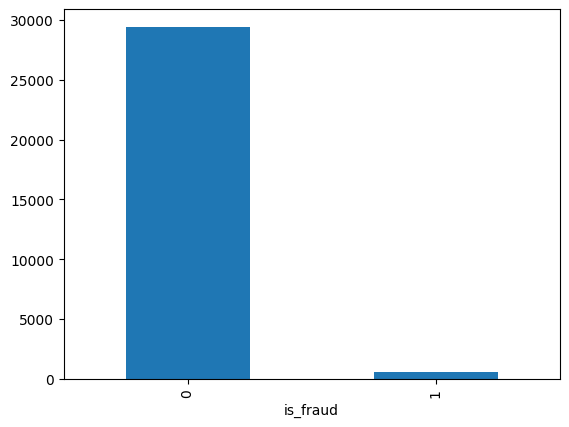

In [40]:
df['is_fraud'].value_counts(normalize=True)
df['is_fraud'].value_counts().plot(kind='bar')




In [41]:
df.rename(columns={
    'num_items_in_cart': 'items_quantity'}, inplace=True)

In [42]:
fraud_df = df[df['is_fraud'] == 1]
fraud_df.head(20)

,acc_days,failed_logins,is_vpn_or_proxy,transaction_amount,is_card_blacklisted,is_multiple_cards_used,items_quantity,pages_viewed,device_change_during_session,category,purchase_frequency_user,is_fraud,email
29,92,0,True,14300.0,True,False,8,19,True,Beauty,15,1,invalidgmail@rinedasinf.com
54,8,5,True,16269.0,True,True,7,20,True,Home Appliances,7,1,username@pandagang.com
62,49,0,True,1953.0,True,False,1,15,True,Electronics,15,1,username@pandagang.com
63,85,1,True,13818.0,True,False,9,16,True,Home Appliances,3,1,fakeuser@haha.com
110,79,3,True,11906.0,True,False,2,14,True,Electronics,2,1,user@invalid_domain.com
116,23,1,True,16254.0,True,True,9,2,True,Beauty,26,1,username@pandagang.com
125,70,1,True,1150.0,True,False,7,19,False,Electronics,5,1,username@pandagang.com
146,26,5,True,10760.0,False,True,11,18,True,Groceries,2,1,g984xg33@gmail.com
149,60,5,True,17830.0,True,False,10,18,True,Groceries,25,1,fakeuser@haha.com
251,70,3,True,1499.0,True,False,6,15,True,Fashion,18,1,user@invalid_domain.com


In [43]:
df

,acc_days,failed_logins,is_vpn_or_proxy,transaction_amount,is_card_blacklisted,is_multiple_cards_used,items_quantity,pages_viewed,device_change_during_session,category,purchase_frequency_user,is_fraud,email
0,503,5,False,1113.62,False,False,2,17,False,Electronics,26,0,zf6iovpb@outlook.com
1,1538,2,False,237.44,False,False,4,18,False,Home Appliances,8,0,xc6f68k1@gmail.com
2,607,5,False,420.57,False,False,4,9,False,Electronics,26,0,b1v619a1@gmail.com
3,1399,2,False,322.88,False,True,3,5,False,Groceries,14,0,avmp55jz@gmail.com
4,1201,4,False,380.86,False,True,2,1,False,Beauty,17,0,baoqjqza@gmail.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1174,3,False,1131.93,False,True,5,19,False,Groceries,13,0,2vgryd9y@gmail.com
29996,640,5,True,710.20,False,False,1,20,False,Beauty,15,0,lxfihhlm@outlook.com
29997,1550,0,False,48.85,False,True,4,8,False,Fashion,28,0,bos3d0pu@yahoo.com
29998,828,0,False,1090.89,False,False,5,10,False,Home Appliances,14,0,98vr2iir@outlook.com


In [44]:
import pandas as pd
import random
import string



# Prepare real domains
real_domains = ['gmail.com', 'yahoo.com', 'outlook.com']

# Count fraud and non-fraud users
non_fraud_count = (df['is_fraud'] == 0).sum()
fraud_count = (df['is_fraud'] == 1).sum()

# Real emails for non-fraud users
real_emails_non_fraud = [
    f"{''.join(random.choices(string.ascii_lowercase + string.digits, k=8))}@{random.choice(real_domains)}"
    for _ in range(non_fraud_count)
]

# 20% of fraud users get real emails
fraud_real_count = int(0.2 * fraud_count)
fraud_fake_count = fraud_count - fraud_real_count

# Real emails for 20% of fraud users
real_emails_fraud = [
    f"{''.join(random.choices(string.ascii_lowercase + string.digits, k=8))}@{random.choice(real_domains)}"
    for _ in range(fraud_real_count)
]

# Fake emails for 80% of fraud users
fake_emails_fraud = []
for _ in range(fraud_fake_count):
    fake_type = random.choice(['no_at', 'missing_domain', 'garbled', 'invalid_domain', 'invalid_tld'])
    if fake_type == 'no_at':
        fake_emails_fraud.append('invalidgmail@rinedasinf.com')
    elif fake_type == 'missing_domain':
        fake_emails_fraud.append('username@pandagang.com')
    elif fake_type == 'garbled':
        fake_emails_fraud.append(''.join(random.choices('!@#$%^&*()_+=', k=10)) + '@chor.com')
    elif fake_type == 'invalid_domain':
        fake_emails_fraud.append('user@invalid_domain.com')
    elif fake_type == 'invalid_tld':
        fake_emails_fraud.append('fakeuser@haha.com')

# Merge and shuffle fraud email pool (80% fake, 20% real)
fraud_emails = real_emails_fraud + fake_emails_fraud
random.shuffle(fraud_emails)

# Build final email column
email_column = []
non_fraud_idx = 0
fraud_idx = 0

for is_fraud in df['is_fraud']:
    if is_fraud == 0:
        email_column.append(real_emails_non_fraud[non_fraud_idx])
        non_fraud_idx += 1
    else:
        email_column.append(fraud_emails[fraud_idx])
        fraud_idx += 1

# Add to DataFrame
df['email'] = email_column

# # Save updated dataset
# df.to_csv('fraud_with_20percent_valid_emails.csv', index=False)

# Sample view
print(df[['is_fraud', 'email']].groupby('is_fraud').head(3))


    is_fraud                email
0          0   7z2fd34t@gmail.com
1          0   u98hntm8@yahoo.com
2          0   66vov6f2@yahoo.com
29         1  (*#$#=_)**@chor.com
54         1    fakeuser@haha.com
62         1  #=%_&+(^#%@chor.com


In [45]:

df

,acc_days,failed_logins,is_vpn_or_proxy,transaction_amount,is_card_blacklisted,is_multiple_cards_used,items_quantity,pages_viewed,device_change_during_session,category,purchase_frequency_user,is_fraud,email
0,503,5,False,1113.62,False,False,2,17,False,Electronics,26,0,7z2fd34t@gmail.com
1,1538,2,False,237.44,False,False,4,18,False,Home Appliances,8,0,u98hntm8@yahoo.com
2,607,5,False,420.57,False,False,4,9,False,Electronics,26,0,66vov6f2@yahoo.com
3,1399,2,False,322.88,False,True,3,5,False,Groceries,14,0,fpm3wt6y@outlook.com
4,1201,4,False,380.86,False,True,2,1,False,Beauty,17,0,51wk0k7h@yahoo.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1174,3,False,1131.93,False,True,5,19,False,Groceries,13,0,rzobe3zp@gmail.com
29996,640,5,True,710.20,False,False,1,20,False,Beauty,15,0,2ym5x7co@gmail.com
29997,1550,0,False,48.85,False,True,4,8,False,Fashion,28,0,a1u4zf4r@yahoo.com
29998,828,0,False,1090.89,False,False,5,10,False,Home Appliances,14,0,aa02f08i@gmail.com


In [46]:
updated_df = df[df['is_fraud'] == 1]
updated_df.head(20)

,acc_days,failed_logins,is_vpn_or_proxy,transaction_amount,is_card_blacklisted,is_multiple_cards_used,items_quantity,pages_viewed,device_change_during_session,category,purchase_frequency_user,is_fraud,email
29,92,0,True,14300.0,True,False,8,19,True,Beauty,15,1,(*#$#=_)**@chor.com
54,8,5,True,16269.0,True,True,7,20,True,Home Appliances,7,1,fakeuser@haha.com
62,49,0,True,1953.0,True,False,1,15,True,Electronics,15,1,#=%_&+(^#%@chor.com
63,85,1,True,13818.0,True,False,9,16,True,Home Appliances,3,1,(#=($($%(#@chor.com
110,79,3,True,11906.0,True,False,2,14,True,Electronics,2,1,username@pandagang.com
116,23,1,True,16254.0,True,True,9,2,True,Beauty,26,1,fakeuser@haha.com
125,70,1,True,1150.0,True,False,7,19,False,Electronics,5,1,f1592yc7@gmail.com
146,26,5,True,10760.0,False,True,11,18,True,Groceries,2,1,username@pandagang.com
149,60,5,True,17830.0,True,False,10,18,True,Groceries,25,1,fakeuser@haha.com
251,70,3,True,1499.0,True,False,6,15,True,Fashion,18,1,invalidgmail@rinedasinf.com


<Axes: xlabel='device_change_during_session'>

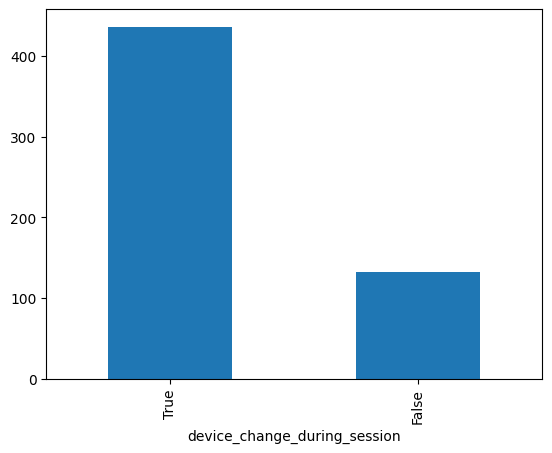

In [47]:
updated_df['device_change_during_session'].value_counts(normalize=True)
updated_df['device_change_during_session'].value_counts().plot(kind='bar')


In [48]:
df.columns

Index(['acc_days', 'failed_logins', 'is_vpn_or_proxy', 'transaction_amount',
       'is_card_blacklisted', 'is_multiple_cards_used', 'items_quantity',
       'pages_viewed', 'device_change_during_session', 'category',
       'purchase_frequency_user', 'is_fraud', 'email'],
      dtype='object')

In [49]:
irrelevant_features = [
    'user_id', 'email', 'ip_address', 'browser_info',
    'login_time', 'business_branch_id'
]

# Filter list to columns that exist in df.columns
cols_to_drop = [col for col in irrelevant_features if col in df.columns]

df = df.drop(columns=cols_to_drop)




In [50]:
df

,acc_days,failed_logins,is_vpn_or_proxy,transaction_amount,is_card_blacklisted,is_multiple_cards_used,items_quantity,pages_viewed,device_change_during_session,category,purchase_frequency_user,is_fraud
0,503,5,False,1113.62,False,False,2,17,False,Electronics,26,0
1,1538,2,False,237.44,False,False,4,18,False,Home Appliances,8,0
2,607,5,False,420.57,False,False,4,9,False,Electronics,26,0
3,1399,2,False,322.88,False,True,3,5,False,Groceries,14,0
4,1201,4,False,380.86,False,True,2,1,False,Beauty,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1174,3,False,1131.93,False,True,5,19,False,Groceries,13,0
29996,640,5,True,710.20,False,False,1,20,False,Beauty,15,0
29997,1550,0,False,48.85,False,True,4,8,False,Fashion,28,0
29998,828,0,False,1090.89,False,False,5,10,False,Home Appliances,14,0


<Axes: xlabel='is_card_blacklisted'>

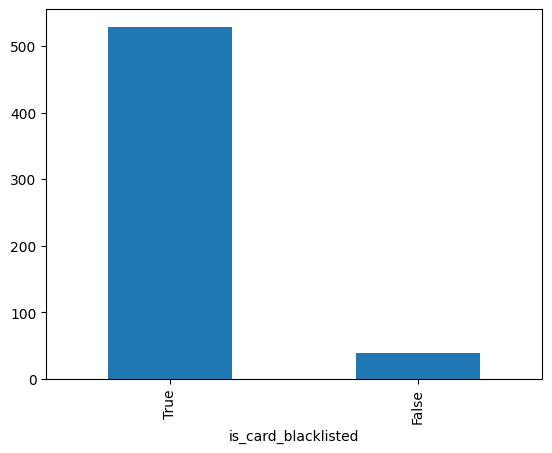

In [51]:
df.groupby('is_fraud')['is_card_blacklisted'].describe()
updated_df['is_card_blacklisted'].value_counts(normalize=True)
updated_df['is_card_blacklisted'].value_counts().plot(kind='bar')

<Axes: xlabel='is_vpn_or_proxy'>

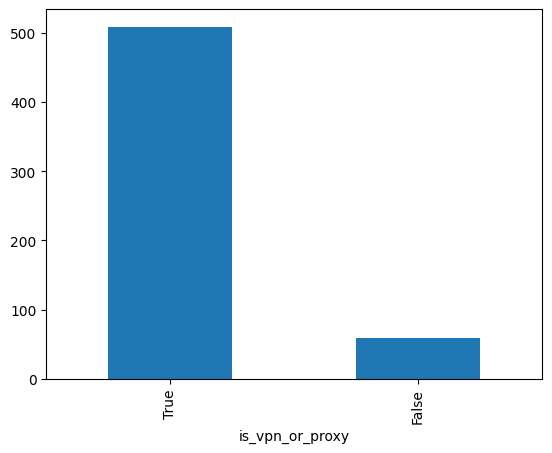

In [52]:
updated_df['is_vpn_or_proxy'].value_counts(normalize=True)
updated_df['is_vpn_or_proxy'].value_counts().plot(kind='bar')

In [53]:
pd.crosstab(df['is_card_blacklisted'], df['is_fraud'], margins=True)


is_fraud,0,1,All
is_card_blacklisted,,,
False,28004,39,28043
True,1428,529,1957
All,29432,568,30000


In [54]:
pd.crosstab(df['device_change_during_session'], df['is_fraud'], margins=True)

is_fraud,0,1,All
device_change_during_session,,,
False,27947,132,28079
True,1485,436,1921
All,29432,568,30000


In [55]:
pd.crosstab(df['is_vpn_or_proxy'], df['is_fraud'], margins=True)

is_fraud,0,1,All
is_vpn_or_proxy,,,
False,26502,59,26561
True,2930,509,3439
All,29432,568,30000


In [56]:
df

,acc_days,failed_logins,is_vpn_or_proxy,transaction_amount,is_card_blacklisted,is_multiple_cards_used,items_quantity,pages_viewed,device_change_during_session,category,purchase_frequency_user,is_fraud
0,503,5,False,1113.62,False,False,2,17,False,Electronics,26,0
1,1538,2,False,237.44,False,False,4,18,False,Home Appliances,8,0
2,607,5,False,420.57,False,False,4,9,False,Electronics,26,0
3,1399,2,False,322.88,False,True,3,5,False,Groceries,14,0
4,1201,4,False,380.86,False,True,2,1,False,Beauty,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1174,3,False,1131.93,False,True,5,19,False,Groceries,13,0
29996,640,5,True,710.20,False,False,1,20,False,Beauty,15,0
29997,1550,0,False,48.85,False,True,4,8,False,Fashion,28,0
29998,828,0,False,1090.89,False,False,5,10,False,Home Appliances,14,0


In [57]:
df['category'].value_counts()

category
Home Appliances    6160
Groceries          6036
Beauty             5961
Fashion            5943
Electronics        5900
Name: count, dtype: int64

In [58]:
categorical_cols = [
    'category'
]

In [59]:
X.columns

Index(['acc_days', 'failed_logins', 'is_vpn_or_proxy', 'transaction_amount',
       'is_card_blacklisted', 'is_multiple_cards_used', 'items_quantity',
       'pages_viewed', 'device_change_during_session', 'category',
       'purchase_frequency_user'],
      dtype='object')

In [60]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

X=df.drop(columns=['is_fraud'])
y=df['is_fraud']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # keep all other columns as is
)


X_encoded = preprocessor.fit_transform(X)

print("Encoded feature shape:",X_encoded.shape)

Encoded feature shape: (30000, 15)


In [61]:
X_encoded

array([[0.0, 1.0, 0.0, ..., 17, False, 26],
       [0.0, 0.0, 0.0, ..., 18, False, 8],
       [0.0, 1.0, 0.0, ..., 9, False, 26],
       ...,
       [0.0, 0.0, 1.0, ..., 8, False, 28],
       [0.0, 0.0, 0.0, ..., 10, False, 14],
       [1.0, 0.0, 0.0, ..., 8, False, 4]], shape=(30000, 15), dtype=object)

In [62]:
df.columns

Index(['acc_days', 'failed_logins', 'is_vpn_or_proxy', 'transaction_amount',
       'is_card_blacklisted', 'is_multiple_cards_used', 'items_quantity',
       'pages_viewed', 'device_change_during_session', 'category',
       'purchase_frequency_user', 'is_fraud'],
      dtype='object')

In [63]:
df['is_fraud'].value_counts(normalize=True)


is_fraud
0    0.981067
1    0.018933
Name: proportion, dtype: float64

In [64]:
X_encoded

array([[0.0, 1.0, 0.0, ..., 17, False, 26],
       [0.0, 0.0, 0.0, ..., 18, False, 8],
       [0.0, 1.0, 0.0, ..., 9, False, 26],
       ...,
       [0.0, 0.0, 1.0, ..., 8, False, 28],
       [0.0, 0.0, 0.0, ..., 10, False, 14],
       [1.0, 0.0, 0.0, ..., 8, False, 4]], shape=(30000, 15), dtype=object)

In [65]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_encoded, y)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression\

X_train, X_test,y_train,y_test = train_test_split(X_encoded,y,test_size=0.2,random_state=42,stratify=y)

model = LogisticRegression(class_weight='balanced',max_iter=1000,random_state=42)

model.fit(X_train,y_train)


y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\Accuracy Score:", accuracy_score(y_test, y_pred))





 Confusion Matrix:
 [[5886    0]
 [   0  114]]

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5886
           1       1.00      1.00      1.00       114

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000

\Accuracy Score: 1.0


<>:17: SyntaxWarning: invalid escape sequence '\A'
<>:17: SyntaxWarning: invalid escape sequence '\A'
C:\Users\ACER\AppData\Local\Temp\ipykernel_56336\1030536681.py:17: SyntaxWarning: invalid escape sequence '\A'
  print("\Accuracy Score:", accuracy_score(y_test, y_pred))


Testing the New Data

In [ ]:
import numpy as np

# Get feature names from the preprocessor (OneHotEncoder + passthrough)
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(['category'])
other_features = [col for col in X.columns if col != 'category']
feature_names = np.concatenate([cat_features, other_features])

coefficients = model.coef_[0]    # logistic regression returns a list of arrays

# Create a DataFrame to display
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Add absolute value for sorting
coef_df['|Coefficient|'] = np.abs(coef_df['Coefficient'])

# Sort by importance
coef_df_sorted = coef_df.sort_values(by='|Coefficient|', ascending=False)

print(coef_df_sorted[['Feature', 'Coefficient']])


                         Feature  Coefficient
5                       acc_days    -0.106354
8             transaction_amount     0.020018
14       purchase_frequency_user     0.010627
12                  pages_viewed     0.007462
11                items_quantity     0.005656
6                  failed_logins     0.001988
9            is_card_blacklisted     0.000801
7                is_vpn_or_proxy     0.000744
13  device_change_during_session     0.000655
10        is_multiple_cards_used     0.000366
4       category_Home Appliances     0.000235
3             category_Groceries     0.000195
0                category_Beauty     0.000116
1           category_Electronics     0.000082
2               category_Fashion     0.000026


In [ ]:
import cloudpickle

with open('fraud_detection_model.pkl', 'wb') as f:
    cloudpickle.dump(model, f)